In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
DataWalmart = pd.read_csv("https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/train.csv")

Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:
    
    Store - the store number

    Dept - the department number

    Date - the week

    Weekly_Sales - sales for the given department in the given store

    IsHoliday - whether the week is a special holiday week

#### Load the data and set index to Date


In [3]:
DataWalmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
DataWalmart['Date'] = pd.to_datetime(DataWalmart['Date'])
DataWalmart.set_index('Date',inplace=True)

#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store. Let's call new dataset store1_sales and its variable "Weekly_Sales"


In [12]:
store1 = DataWalmart[DataWalmart['Store']==1].copy()
store1_sales = store1['Weekly_Sales'].resample('W','sum')
store1_sales.head()

Date
2010-02-07    1643690.90
2010-02-14    1641957.44
2010-02-21    1611968.17
2010-02-28    1409727.59
2010-03-07    1554806.68
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

#### Plot the Weekly_Sales. What general trends do you observe?


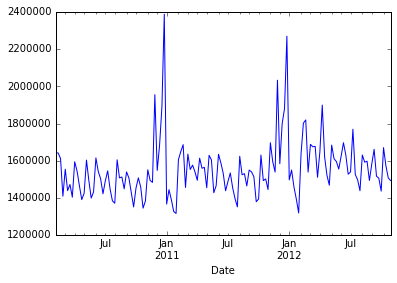

In [13]:
store1_sales.plot()

Answer: We can observe that close to Jan, sales increase.

#### Create an autocorrelation plot and explain your findings

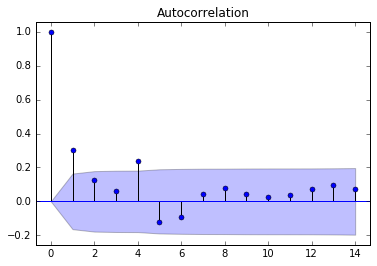

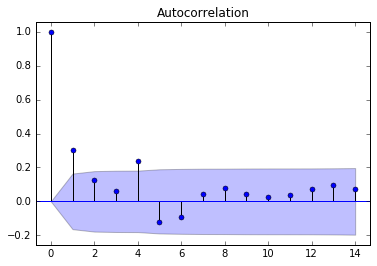

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(store1_sales, lags=14)

#### Split the weekly sales data in a training and test set - using 80% of the data for training

In [17]:
n = len(store1_sales)
train = store1_sales[:int(.8*n)] #first 75% of data assigned to training set
test = store1_sales[int(.8*n):]  #last 25% of data assigned to our test set

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [19]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

70810.2678741


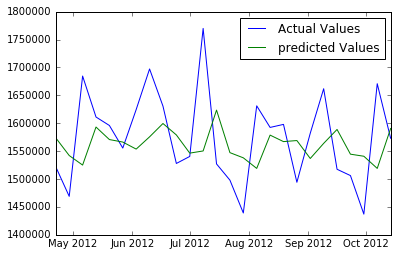

In [20]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

# Let's test our model on last 20% of data
p = 1
d = 0
q = 0
TestRatio = 0.20
pred = []
indexData = []
ActualObservations = []
n = len(store1_sales)
for i in range(1,int(TestRatio*n-1)):
    train = store1_sales[:(int((1-TestRatio)*n+i))]
    test = store1_sales[(int((1-TestRatio)*n+i)):]
    model = ARIMA(train,(p, d, q)).fit()
    predictions = model.predict(start = str(test.index.date[0]), end= str(test.index.date[0])) 
    pred.append(predictions[0])
    indexData.append(test.index.date[0])
    ActualObservations.append(store1_sales[test.index.date[0]])
    #print predictions

PredictActualDataFrame = pd.DataFrame({'predicted Values':pred,
                                       'Actual Values':ActualObservations,
                                       },index = indexData)
PredictActualDataFrame.plot()

MAD = (mean_absolute_error(pred, ActualObservations)) 
print MAD

#### Plot the residuals - where are their significant errors.

Answer: Everything seems to be fine except end of DEC close to Jan.

#### Compute and AR(2) model and an ARIMA(3, 1,) model - does this improve your mean absolute error on the held out set.


#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.


Answer: It seems like 